# Regresión Lineal: Costo de un incidente de Seguridad.
En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

### Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

# 1.- Generación del DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.rand(100, 1) 

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

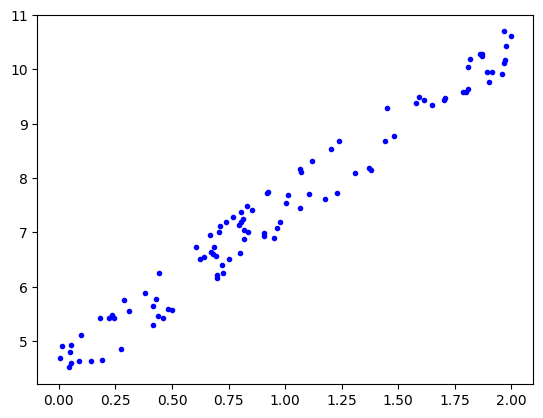

In [3]:
plt.plot(X, Y, "b.")
plt.show()

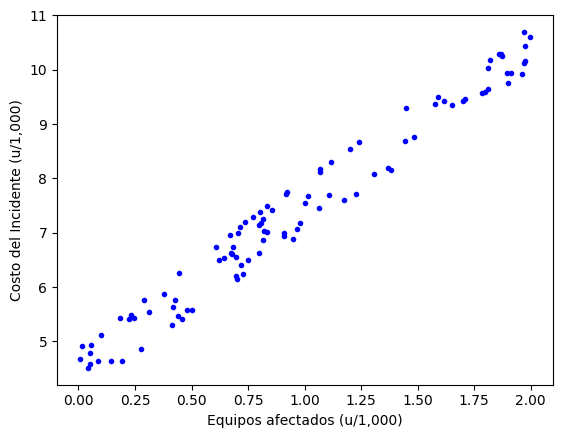

In [4]:
plt.plot(X, Y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/1,000)")
plt.show()

# 3.- Modificación del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_Afectados':X.flatten(), 'Costo':Y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.577772,9.376681
1,0.414319,5.293449
2,0.804472,7.377209
3,1.174642,7.606267
4,1.201184,8.534087
5,1.065148,7.448569
6,0.918782,7.718904
7,0.908919,6.938326
8,0.438214,5.463014
9,1.229045,7.716236


In [7]:
# Escalado del número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,1577,93766
1,414,52934
2,804,73772
3,1174,76062
4,1201,85340
5,1065,74485
6,918,77189
7,908,69383
8,438,54630
9,1229,77162


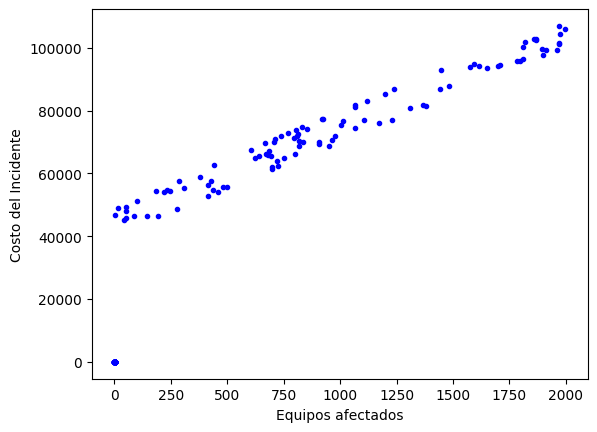

In [8]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X, Y, "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 4.- Construcción del Modelo.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construccion del modelo y ajuste de la fucnion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [11]:
# Parametro Tetha 0
lin_reg.intercept_

np.float64(45895.94125186304)

In [13]:
# Parametro Theta1
lin_reg.coef_

array([29.16830073])

In [16]:
# Prediccion para el valor minimo y maximo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df["No_Equipos_Afectados"].max()]])
Y_train_pred = lin_reg.predict(X_min_max)

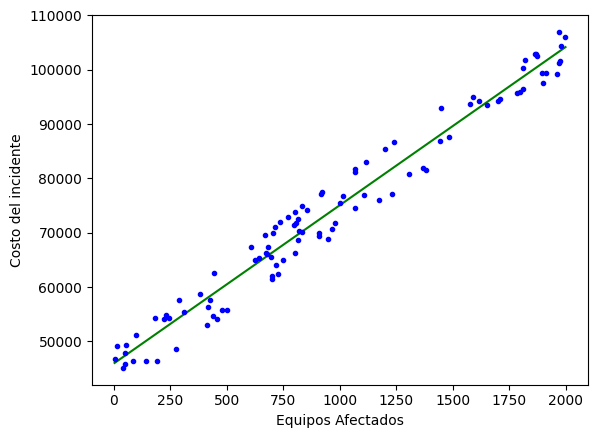

In [17]:
# Representacion gráfica de la función de hipótesis generada
plt.plot(X_min_max, Y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 5.- Prediccion de nuevos ejemplos

In [25]:
x_new = np.array([[1000]]) # Numero de equipos afectados.
# Prediccion del costo que tendria el incidente
Costo = lin_reg.predict(x_new)
print ("El costo del incidente seria: $", int(Costo[0]))
    

El costo del incidente seria: $ 75064


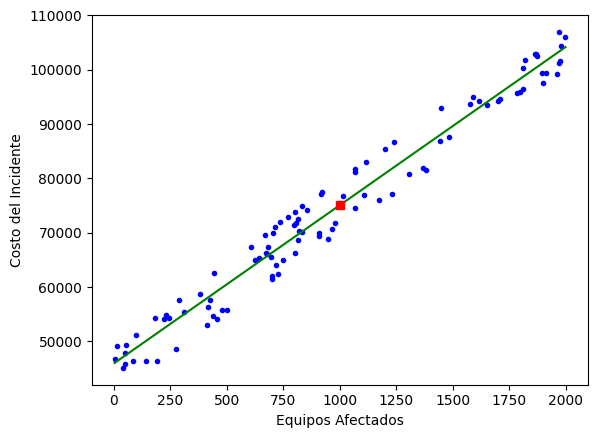

In [26]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, Y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()
